# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

Z miasta A do miasta B kierowca przejechał ze średnią szybkością 60 km/h. Z powrotem jechał szybciej, ze średnią 80 km/h. Jaka była jego średnia szybkość na całej trasie? 

**Uwaga:** nie używaj gotowych implementacji.

> Wskazówka: średnia harmoniczna.

In [1]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
import itertools
from collections import Counter

In [2]:
ab = 60
ba = 80
print(2/ ((1/ab) + (1/ba)))

68.57142857142857


In [3]:
speeds = np.array([60, 80])
print(speeds.shape[0] / sum(1/speed for speed in speeds))

68.57142857142857


### Zadanie 2

Wyobraźmy sobie miasto o liczbie 700 tys. mieszkańców. W mieście pojawiła się choroba i wiemy, że jedna osoba na 1000 zachorowała. Nie wiemy, które to dokładnie osoby, ale jest dostępny test, którego skuteczność wynosi 99%. Teraz wcielamy się w pacjenta, który przeprowadził test, a wynik testu jest pozytywny. Chcemy dowiedzieć się, jakie jest prawdopodobieństwo, że zachorowaliśmy.

#### A)

Przeprowadzić symulację komputerową:

- Generujemy listę wielkości 700 tys.
- Losowo wybieramy 700 tys./1000 (bo jedna na 1000 osob zachorowała) osób i zaznaczamy je jako chore.
- Wybieramy losowo po 1% osob chorych i zdrowych, a następnie zaznaczamy ich diagnoze na nieprawidlowa (bo skutecznosc testu wynosi 99%).
- Oblicz jakie jest prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora (`liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`).



In [4]:
pop_size = 700000
sick_ratio = 1 / 1000

start = time_ns()

people = np.array([False for _ in range(pop_size)])
people[np.random.choice(pop_size, int(pop_size * sick_ratio), replace=False)] = True

healthy = people[people == True]
sick = people[people == False]

healthy[np.random.choice(healthy.shape[0], int(healthy.shape[0] * 0.01), replace=False)] = False
sick[np.random.choice(sick.shape[0], int(sick.shape[0] * 0.01), replace=False)] = True

res = healthy.sum() / (healthy.sum() + sick.sum()) * 100

time_a = time_ns() - start

print(f'Prawdopodobieństwo bycia chorym z pozytywnym wynikiem testu: {res:.3}%\nCzas symulacji: {time_a / 1e9} s')

Prawdopodobieństwo bycia chorym z pozytywnym wynikiem testu: 9.02%
Czas symulacji: 0.0763842 s


#### B)

Napisać funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Zmierz i porównaj czas obliczeń w zad. A i zad. B



In [5]:
def bayes_probability(chance: float, test_sensitivity: float) -> float:
    return test_sensitivity * chance / (test_sensitivity * chance + (1 - test_sensitivity) * (1 - chance))

In [6]:
start = time_ns()
res = bayes_probability(0.001, 0.99) * 100
time_b = time_ns() - start

print(f'Prawdopodobieństwo bycia chorym z pozytywnym wynikiem testu: {res}%\nCzas symulacji: {time_b / 1e9} s')

Prawdopodobieństwo bycia chorym z pozytywnym wynikiem testu: 9.016393442622944%
Czas symulacji: 0.0 s


In [7]:
print(f'Różnica czasu wynosi {(time_a - time_b) / 1e9} s')

Różnica czasu wynosi 0.0763842 s


#### C)

Wyświetl wykres, gdzie na osi X znajduje się _czułość testu_ a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_.

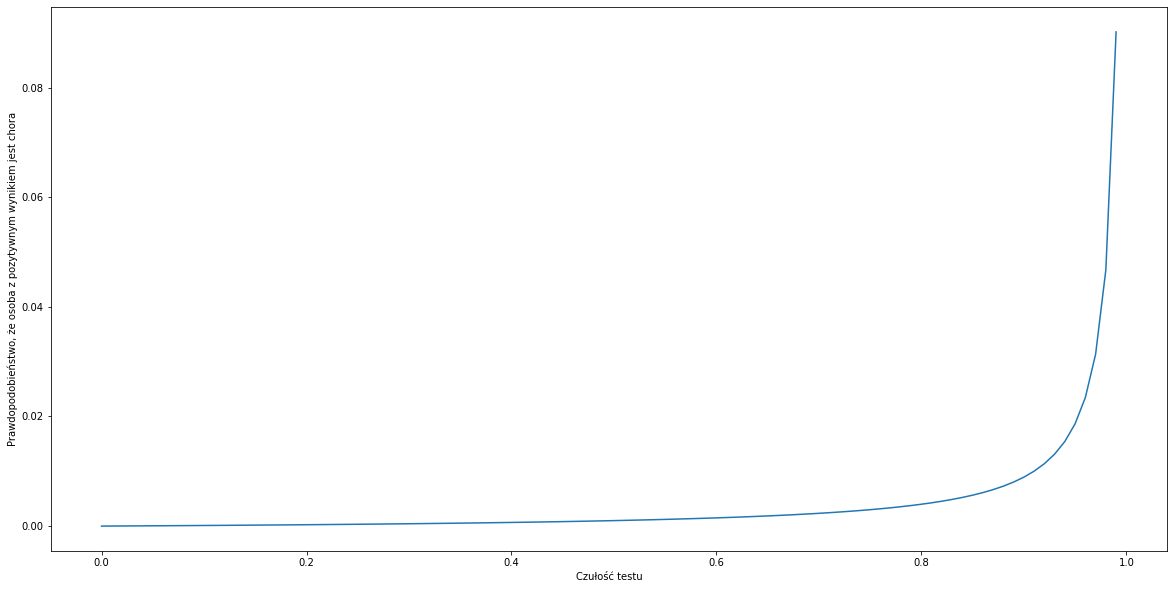

In [8]:
sensitivities = np.arange(0, 1, 0.01)

plt.figure(figsize=(20, 10))
plt.plot(sensitivities, [bayes_probability(0.001, sensitivity) for sensitivity in sensitivities])
plt.xlabel('Czułość testu')
plt.ylabel('Prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora')
plt.show()

### Zadanie 3

Sprawdź (symulacją) jak często trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze z 13 kart. Czyli losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w jakimś kolorze dostaniemy $\ge 8$ kart. Przeprowadź 1000 takich prob i oblicz średnią. Dodatkowo wypisz jedną (np. ostatnią) taką wylosowaną rękę.

In [9]:
def draw_hand_colors(n: int) -> np.ndarray:
    return np.random.choice(52, n, replace=False) // 13

In [10]:
n_iters = 1000
successes = 0
last = None
for _ in range(n_iters):
    hand = draw_hand_colors(13)
    counter = Counter(hand)

    if max(counter.values()) >= 8:
        successes += 1
        last = hand

score = successes / n_iters * 100

print(f'Prawdopodobieństwo trafienia "ręki" zawierającej więcej niż 8 kart w jednym kolorze: {score}%')
print(f'Ostatnia wylosowana ręka spełniajaca warunek: {last}')

Prawdopodobieństwo trafienia "ręki" zawierającej więcej niż 8 kart w jednym kolorze: 0.5%
Ostatnia wylosowana ręka spełniajaca warunek: [3 3 3 0 0 3 3 2 1 1 3 3 3]
